In [1]:
import os
import json
import random
import collections

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def convert_image_id_2_path(image_id: str, is_train: bool = True) -> str:
    folder = "train" if is_train else "test"
    return "{}/{}/{}/{}/{}.npy".format(
        folder, image_id[0], image_id[1], image_id[2], image_id 
    )

In [6]:
train_df = pd.read_csv("training_labels.csv")
train_df

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1
...,...,...
559995,ffff9a5645,1
559996,ffffab0c27,0
559997,ffffcf161a,1
559998,ffffd2c403,0


<Axes: xlabel='target', ylabel='count'>

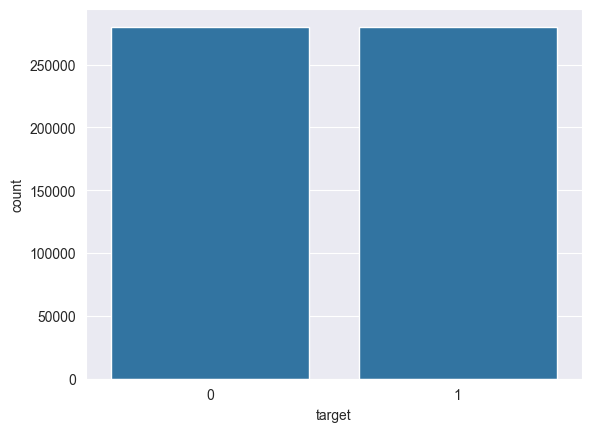

In [7]:
sns.countplot(data=train_df, x="target")

In [12]:
def visualize_sample(
    _id, 
    target, 
    colors=("black", "red", "green"), 
    signal_names=("LIGO Hanford", "LIGO Livingston", "Virgo")
):
    path = convert_image_id_2_path(_id)
    x = np.load(path)
    plt.figure(figsize=(16, 7))
    for i in range(3):
        plt.subplot(4, 1, i + 1)
        plt.plot(x[i], color=colors[i])
        plt.legend([signal_names[i]], fontsize=12, loc="lower right")
        
        plt.subplot(4, 1, 4)
        plt.plot(x[i], color=colors[i])
    
    plt.subplot(4, 1, 4)
    plt.legend(signal_names, fontsize=12, loc="lower right")

    plt.suptitle(f"id: {_id} target: {target}", fontsize=16)
    plt.show()

In [13]:
# random visualization
# for i in random.sample(train_df.index.tolist(), 3):
#     _id = train_df.iloc[i]["id"]
#     target = train_df.iloc[i]["target"]
# 
#     visualize_sample(_id, target)

FileNotFoundError: [Errno 2] No such file or directory: 'train/7/3/9/739a610f99.npy'

In [14]:
import librosa
import librosa.display

In [15]:
def visualize_sample_spectogram(
    _id, 
    target,
    signal_names=("LIGO Hanford", "LIGO Livingston", "Virgo")
):
    x = np.load(convert_image_id_2_path(_id))
    plt.figure(figsize=(16, 5))
    for i in range(3):
        X = librosa.stft(x[i] / x[i].max())
        Xdb = librosa.amplitude_to_db(abs(X))
        plt.subplot(1, 3, i + 1)
        librosa.display.specshow(Xdb, sr=2048, x_axis="time", y_axis="hz", vmin=-30, vmax=50) 
        plt.colorbar()
        plt.title(signal_names[i], fontsize=14)

    plt.suptitle(f"id: {_id} target: {target}", fontsize=16)
    plt.show()

In [ ]:
# random visualization
# for i in random.sample(train_df.index.tolist(), 3):
#     _id = train_df.iloc[i]["id"]
#     target = train_df.iloc[i]["target"]
# 
#     visualize_sample_spectogram(_id, target)

In [16]:
def visualize_sample_mfcc(
    _id, 
    target,
    signal_names=("LIGO Hanford", "LIGO Livingston", "Virgo"),
    sr=2048,
):
    x = np.load(convert_image_id_2_path(_id))
    plt.figure(figsize=(16, 5))
    for i in range(3):
        mfccs = librosa.feature.mfcc(x[i] / x[i].max(), sr=sr)
        plt.subplot(1, 3, i + 1)
        librosa.display.specshow(mfccs, sr=sr, x_axis="time", vmin=-200, vmax=50, cmap="coolwarm")
        plt.title(signal_names[i], fontsize=14)
        plt.colorbar()

    plt.suptitle(f"id: {_id} target: {target}", fontsize=16)
    plt.show()

In [ ]:
# for i in random.sample(train_df.index.tolist(), 3):
#     _id = train_df.iloc[i]["id"]
#     target = train_df.iloc[i]["target"]
# 
#     visualize_sample_mfcc(_id, target)

In [18]:
import torch
from nnAudio.Spectrogram import CQT1992v2

In [19]:
Q_TRANSFORM = CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=32)

def visualize_sample_qtransform(
    _id, 
    target,
    signal_names=("LIGO Hanford", "LIGO Livingston", "Virgo"),
    sr=2048,
):
    x = np.load(convert_image_id_2_path(_id))
    plt.figure(figsize=(16, 5))
    for i in range(3):
        waves = x[i] / np.max(x[i])
        waves = torch.from_numpy(waves).float()
        image = Q_TRANSFORM(waves)
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(image.squeeze())
        plt.title(signal_names[i], fontsize=14)

    plt.suptitle(f"id: {_id} target: {target}", fontsize=16)
    plt.show()

CQT kernels created, time used = 0.0262 seconds


D:\Softwares\Anaconda3\envs\astro\lib\site-packages\nnAudio\utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)


In [20]:
# for i in random.sample(train_df.index.tolist(), 5):
#     _id = train_df.iloc[i]["id"]
#     target = train_df.iloc[i]["target"]
# 
#     visualize_sample(_id, target)
#     visualize_sample_qtransform(_id, target)

FileNotFoundError: [Errno 2] No such file or directory: 'train/e/8/f/e8f909f40e.npy'

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

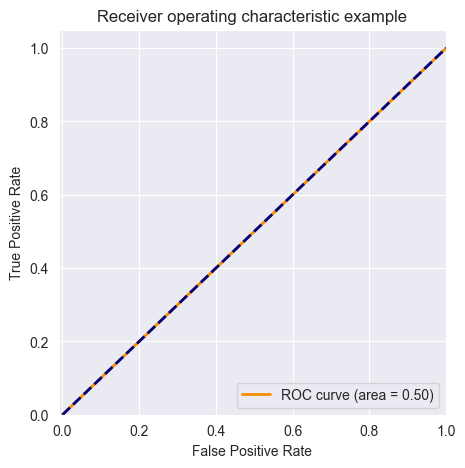

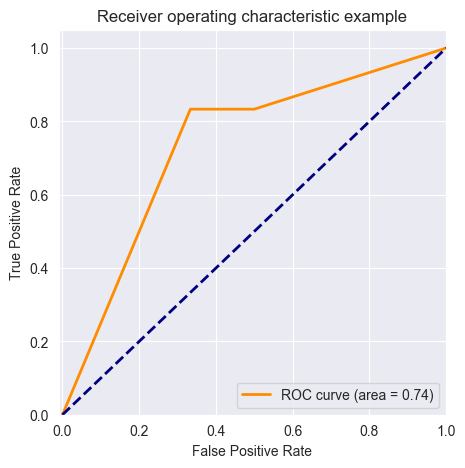

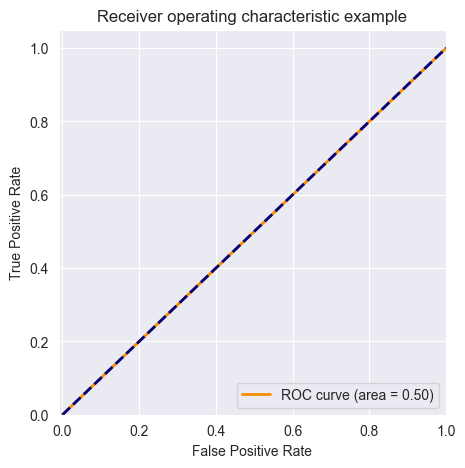

In [22]:
list_y_true = [
    [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.], #  IMBALANCE
]
list_y_pred = [
    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
    [0.9, 0.9, 0.9, 0.9, 0.1, 0.9, 0.9, 0.1, 0.9, 0.1, 0.1, 0.5],
    [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], #  IMBALANCE
]

for y_true, y_pred in zip(list_y_true, list_y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [25]:
submission = pd.read_csv("sample_submission.csv")
submission.to_csv("submission.csv", index=False)

In [ ]:
!pip install efficientnet_pytorch -qq

In [26]:
import time

import torch
from torch import nn
from torch.utils import data as torch_data
from sklearn import model_selection as sk_model_selection
from torch.nn import functional as torch_functional
from torch.autograd import Variable
import efficientnet_pytorch
from sklearn.model_selection import StratifiedKFold

In [27]:
def set_seed(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True


set_seed(42)

In [28]:
class DataRetriever(torch_data.Dataset):
    def __init__(self, paths, targets):
        self.paths = paths
        self.targets = targets

        self.q_transform = CQT1992v2(
            sr=2048, fmin=20, fmax=1024, hop_length=32
        )

    def __len__(self):
        return len(self.paths)

        def __get_qtransform(self, x):
            image = []

        for i in range(3):
            waves = x[i] / np.max(x[i])
            waves = torch.from_numpy(waves).float()
            channel = self.q_transform(waves).squeeze().numpy()
            image.append(channel)

        return torch.tensor(image).float()

    def __getitem__(self, index):
        file_path = convert_image_id_2_path(self.paths[index])
        x = np.load(file_path)
        image = self.__get_qtransform(x)

        y = torch.tensor(self.targets[index], dtype=torch.float)

        return {"X": image, "y": y}

In [29]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = efficientnet_pytorch.EfficientNet.from_pretrained("efficientnet-b7")
        n_features = self.net._fc.in_features
        self.net._fc = nn.Linear(in_features=n_features, out_features=1, bias=True)
    
    def forward(self, x):
        out = self.net(x)
        return out

In [31]:
class LossMeter:
    def __init__(self):
        self.avg = 0
        self.n = 0

    def update(self, val):
        self.n += 1
        # incremental update
        self.avg = val / self.n + (self.n - 1) / self.n * self.avg
        
class AccMeter:
    def __init__(self):
        self.avg = 0
        self.n = 0
        
    def update(self, y_true, y_pred):
        y_true = y_true.cpu().numpy().astype(int)
        y_pred = y_pred.cpu().numpy() >= 0
        last_n = self.n
        self.n += len(y_true)
        true_count = np.sum(y_true == y_pred)
        # incremental update
        self.avg = true_count / self.n + last_n / self.n * self.avg

In [ ]:
class Trainer:
    def __init__(
        self, 
        model, 
        device, 
        optimizer, 
        criterion, 
        loss_meter, 
        score_meter
    ):
        self.model = model
        self.device = device
        self.optimizer = optimizer
        self.criterion = criterion
        self.loss_meter = loss_meter
        self.score_meter = score_meter
        
        self.best_valid_score = -np.inf
        self.n_patience = 0
        
        self.messages = {
            "epoch": "[Epoch {}: {}] loss: {:.5f}, score: {:.5f}, time: {} s",
            "checkpoint": "The score improved from {:.5f} to {:.5f}. Save model to '{}'",
            "patience": "\nValid score didn't improve last {} epochs."
        }
        
    def fit(self, epochs, train_loader, valid_loader, save_path, patience):        
        for n_epoch in range(1, epochs + 1):
            self.info_message("EPOCH: {}", n_epoch)
            
            train_loss, train_score, train_time = self.train_epoch(train_loader)
            valid_loss, valid_score, valid_time = self.valid_epoch(valid_loader)
            
            self.info_message(
                self.messages["epoch"], "Train", n_epoch, train_loss, train_score, train_time
            )
            
            self.info_message(
                self.messages["epoch"], "Valid", n_epoch, valid_loss, valid_score, valid_time
            )
            
            if True:
#             if self.best_valid_score < valid_score:
                self.info_message(
                    self.messages["checkpoint"], self.best_valid_score, valid_score, save_path
                )
                self.best_valid_score = valid_score
                self.save_model(n_epoch, save_path)
                self.n_patience = 0
            else:
                self.n_patience += 1
            
            if self.n_patience >= patience:
                self.info_message(self.messages["patience"], patience)
                break